<a href="https://colab.research.google.com/github/Davron030901/Matplotlib_and_Seaborn/blob/main/12_pairplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn: pairplot

In [ ]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Intro Visuals

In [ ]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)

In [ ]:
sns.set_style('darkgrid')

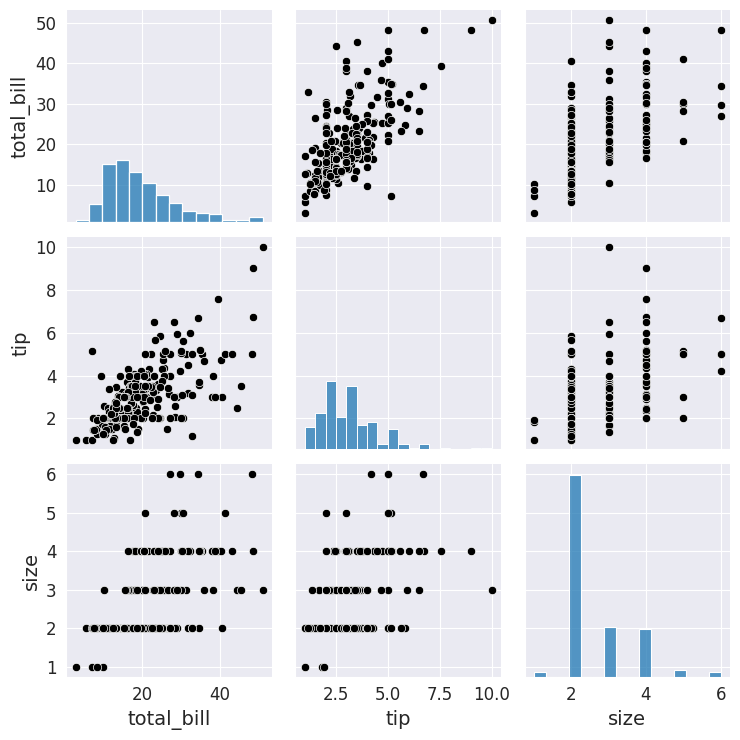

In [ ]:
sns.pairplot(tips,  plot_kws={'color':'black'})
plt.tight_layout()

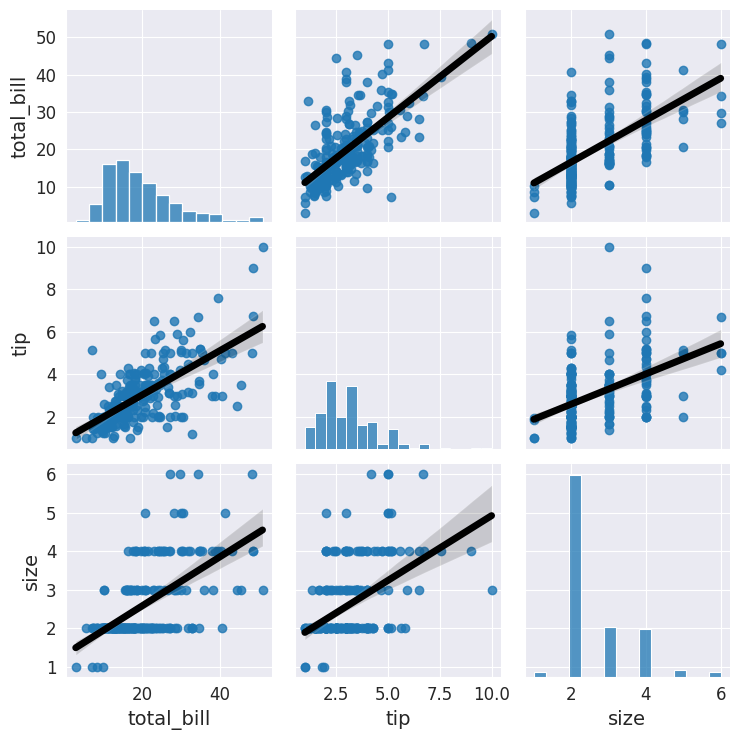

In [ ]:
sns.pairplot(tips, kind='reg', plot_kws={'line_kws': {'color':'black', 'lw': 5}})
plt.tight_layout()

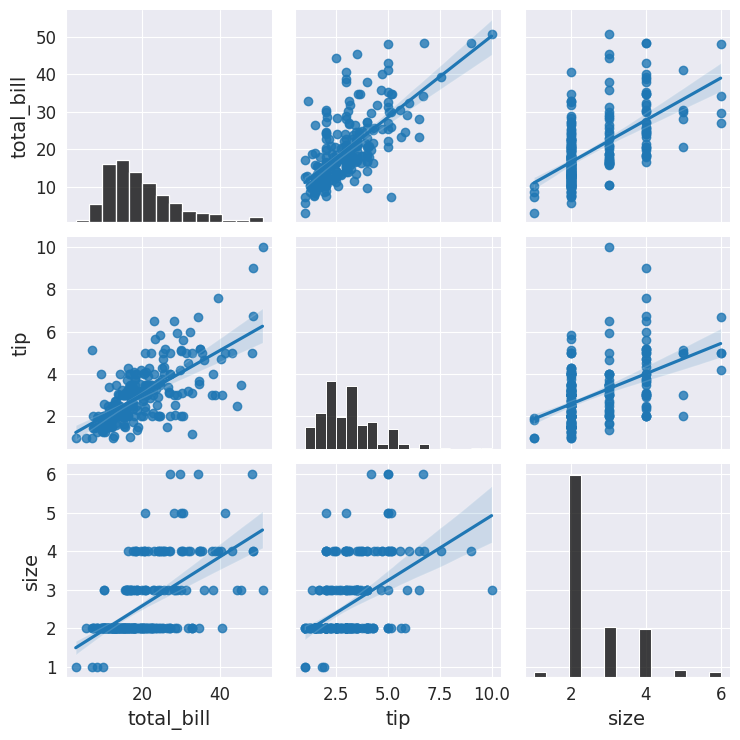

In [ ]:
sns.pairplot(tips, kind='reg',
             diag_kws={'color': 'black'}
            )
plt.tight_layout()

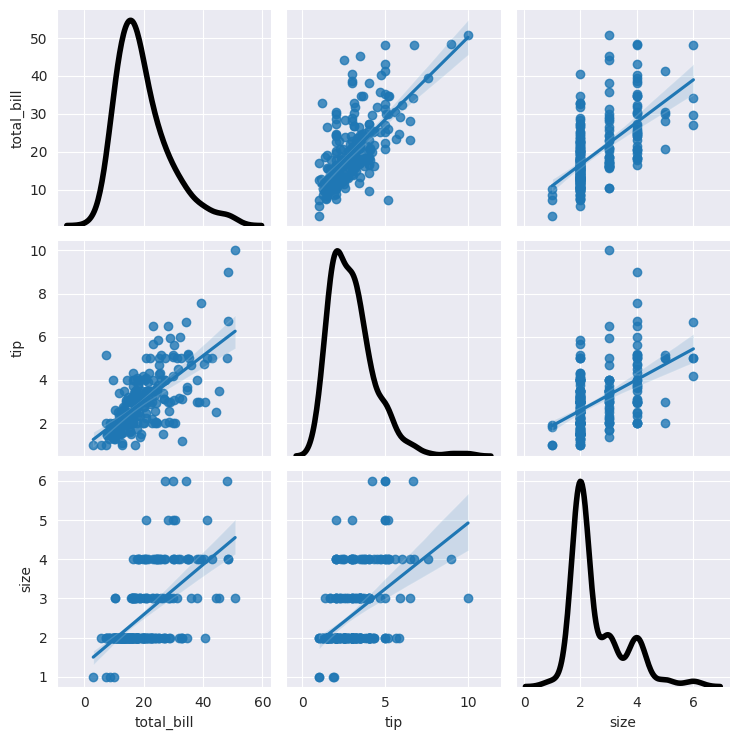

In [ ]:
sns.pairplot(tips, diag_kind='kde', kind='reg',
             diag_kws={'color': 'black', 'fill':False, 'lw': 4}
            )
plt.tight_layout()

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)

## Basics

In [ ]:
sns.set_style('darkgrid')

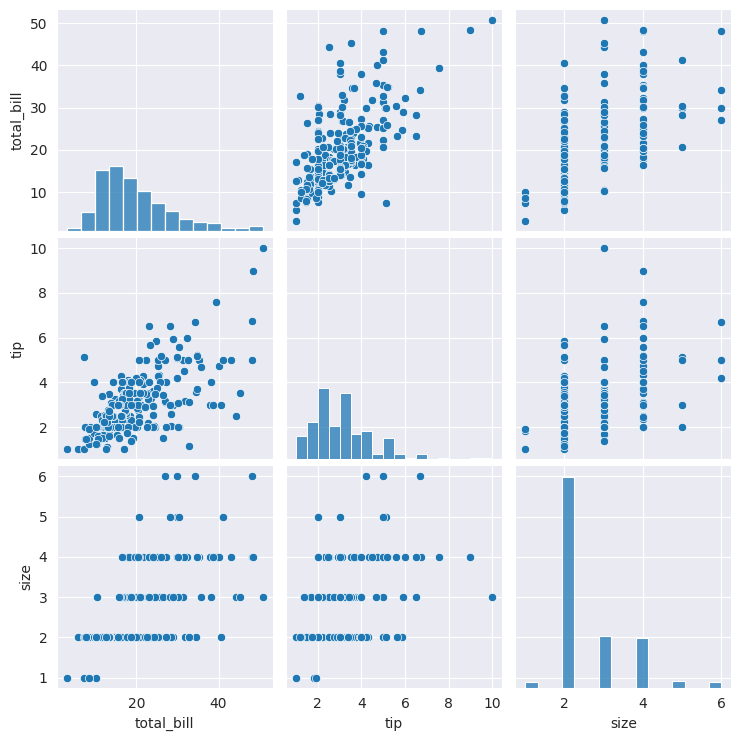

In [ ]:
sns.pairplot(tips)

In [ ]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


Note that the axes tick labels correspond to the bivariate, relational plots and NOT the distribution plots.

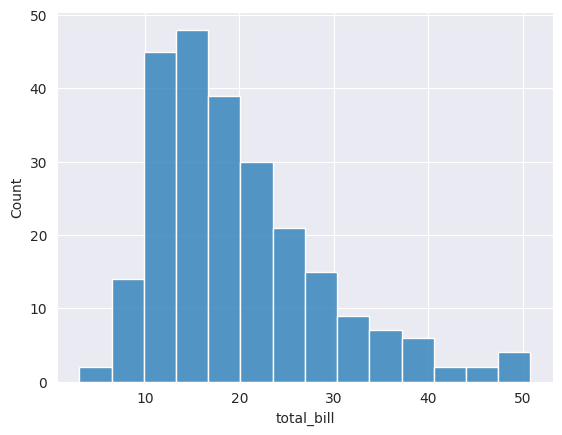

In [ ]:
sns.histplot(tips.total_bill)

## Plot Kinds

### diag_kind

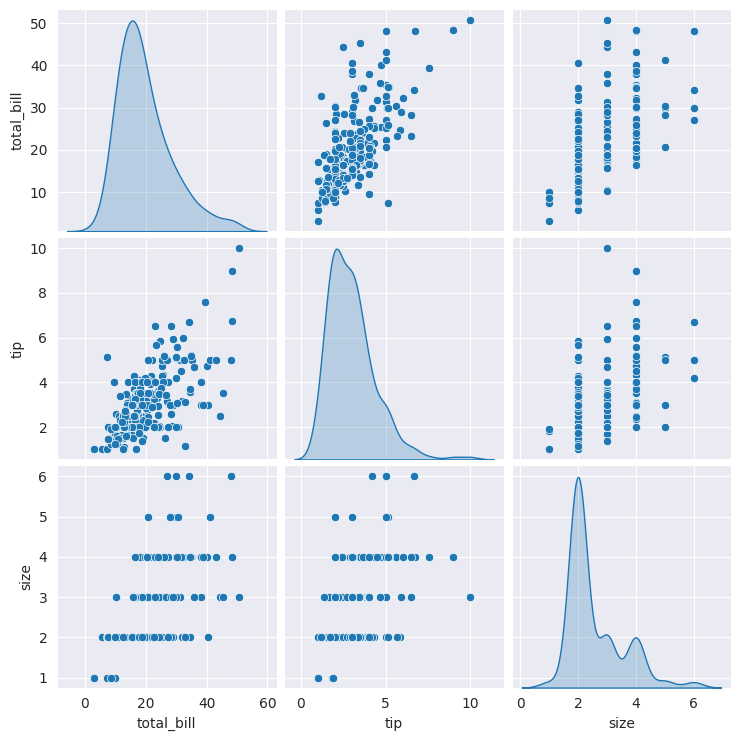

In [ ]:
sns.pairplot(tips, diag_kind='kde')

### kind

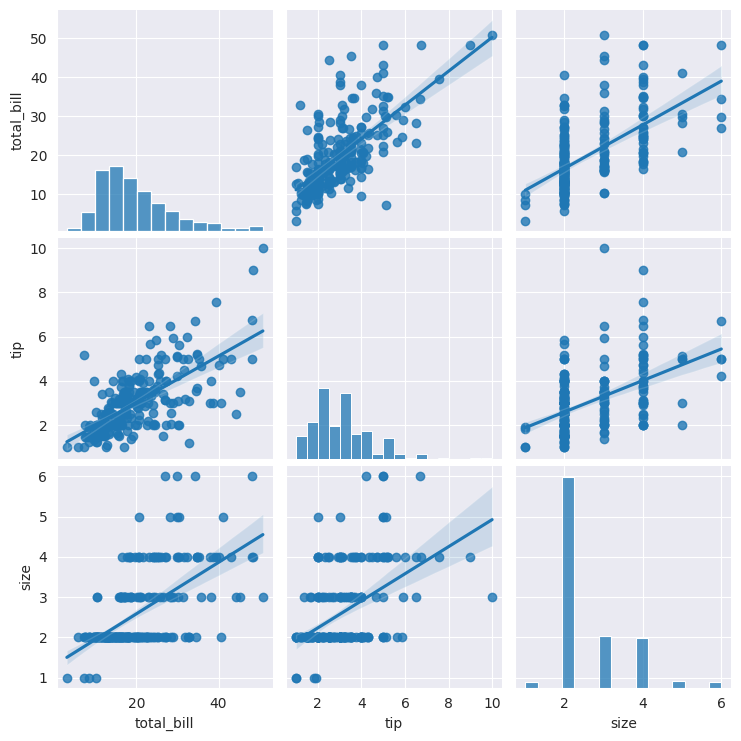

In [ ]:
sns.pairplot(tips, kind='reg')

### Returns PairGrid

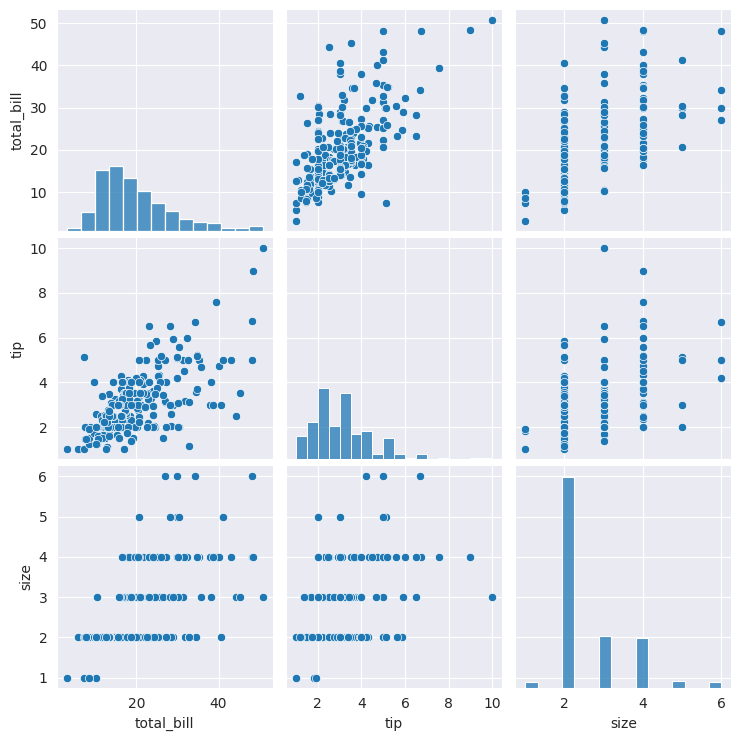

In [ ]:
g = sns.pairplot(tips)

In [ ]:
print(type(g))

<class 'seaborn.axisgrid.PairGrid'>


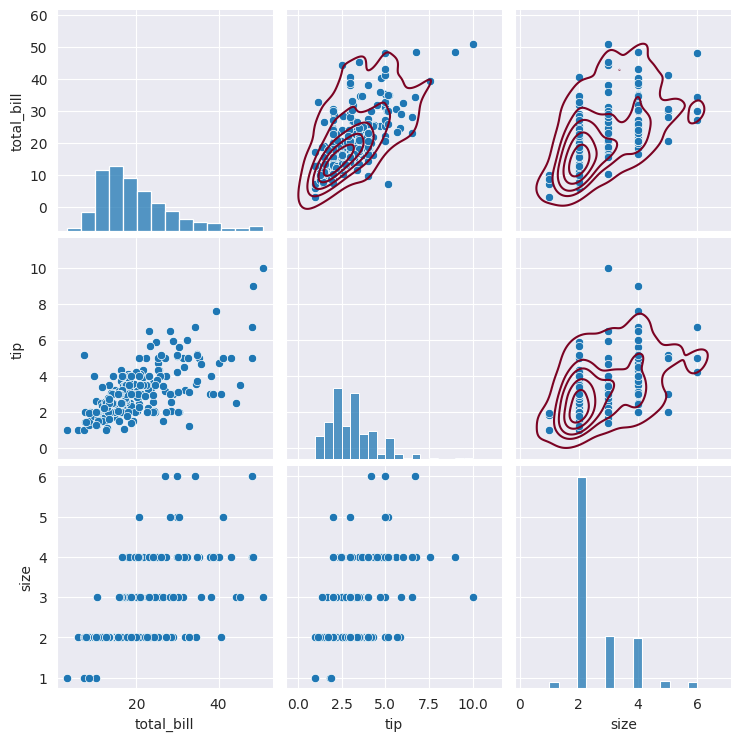

In [ ]:
g = sns.pairplot(tips)
g.map_upper(sns.kdeplot, n_levels=6, color='xkcd:wine red')

## Categorical and Specific Variables

In [ ]:
tips['weekend'] = tips.day.isin(['Sat', 'Sun'])

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


### hue

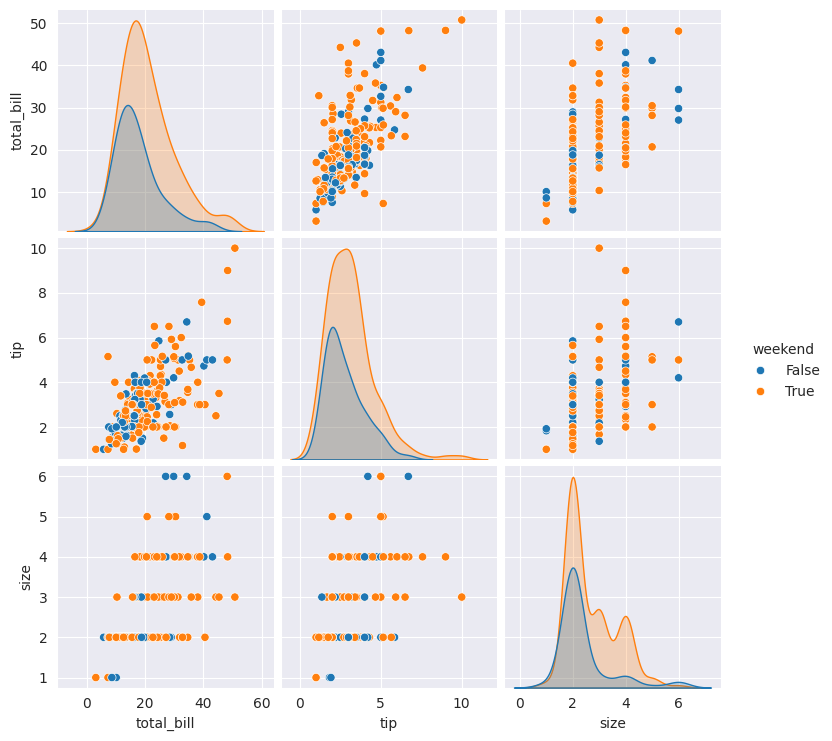

In [ ]:
sns.pairplot(tips, hue='weekend')

In [ ]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64
weekend,bool


### vars, x_vars, y_vars

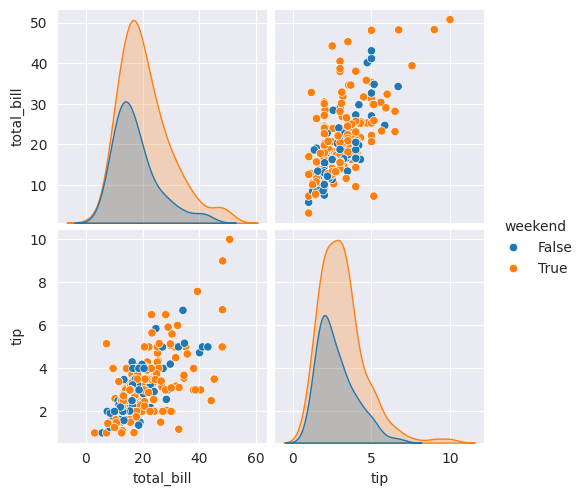

In [ ]:
sns.pairplot(tips, hue='weekend', vars=['total_bill', 'tip'])

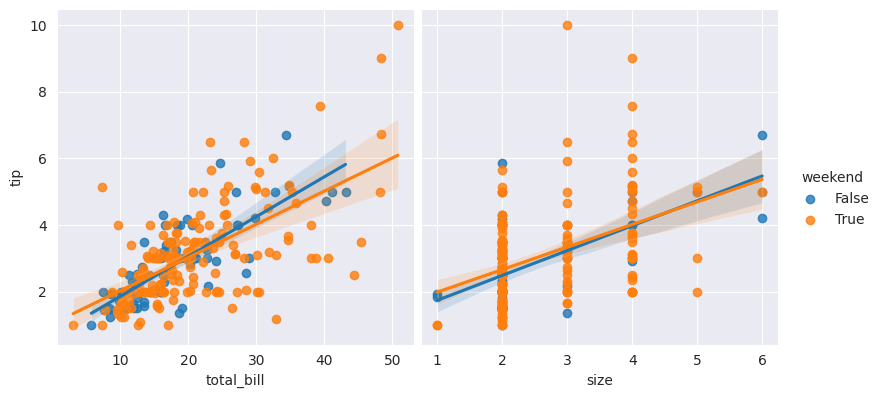

In [ ]:
sns.pairplot(tips,
             hue='weekend',
             y_vars=['tip'],
             x_vars=['total_bill', 'size'],
             kind='reg',
             height=4)

## Styling

In [ ]:
del tips['weekend']

### height, aspect

In [ ]:
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    sns.pairplot(tips, height=height, aspect=aspect)

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

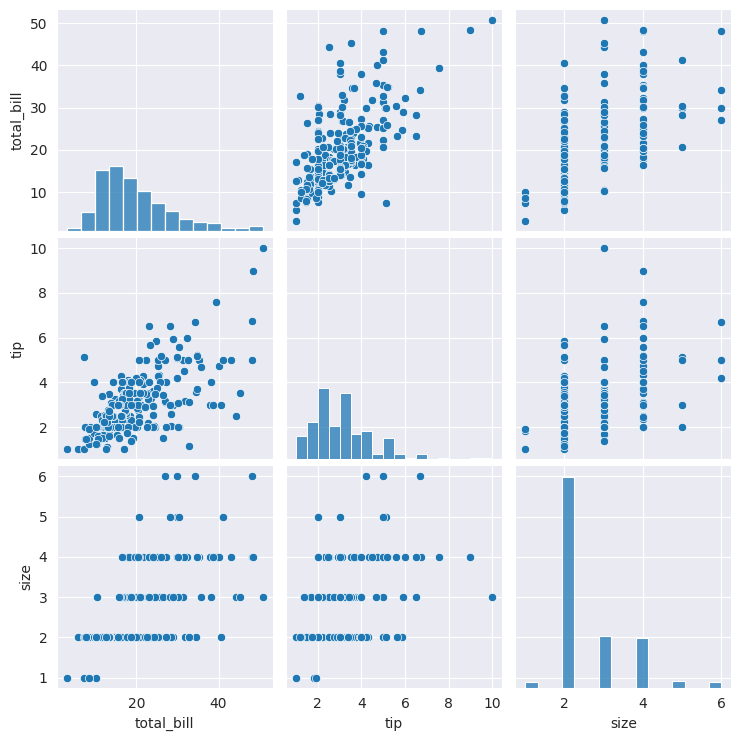

In [ ]:
interactive(size_widget, height=(1, 3.5, 0.5), aspect=(0.5, 2, 0.25))

### palette

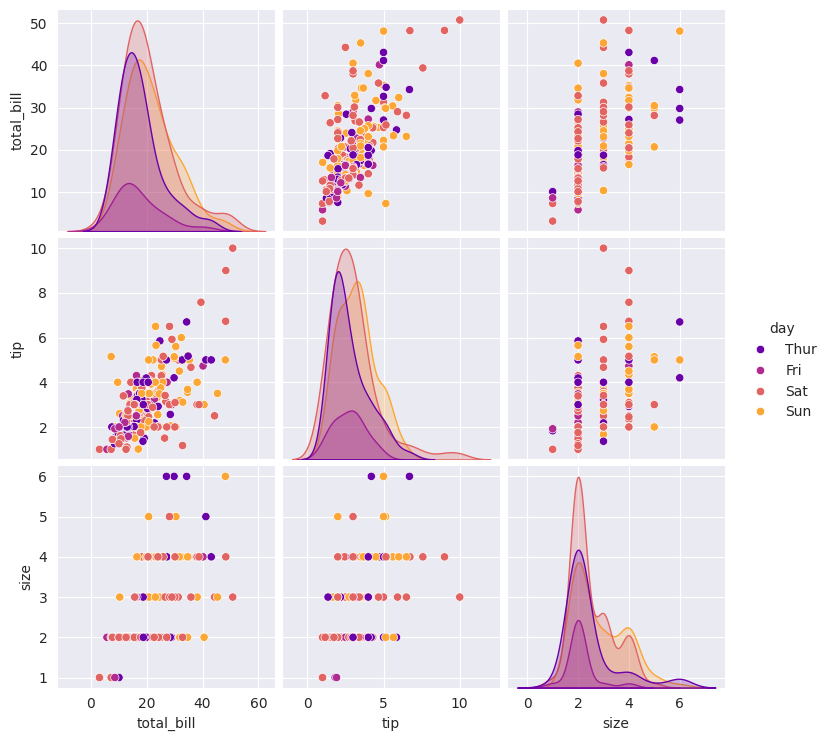

In [ ]:
sns.pairplot(tips, hue='day', palette='plasma')

### diag_kws, plot_kws

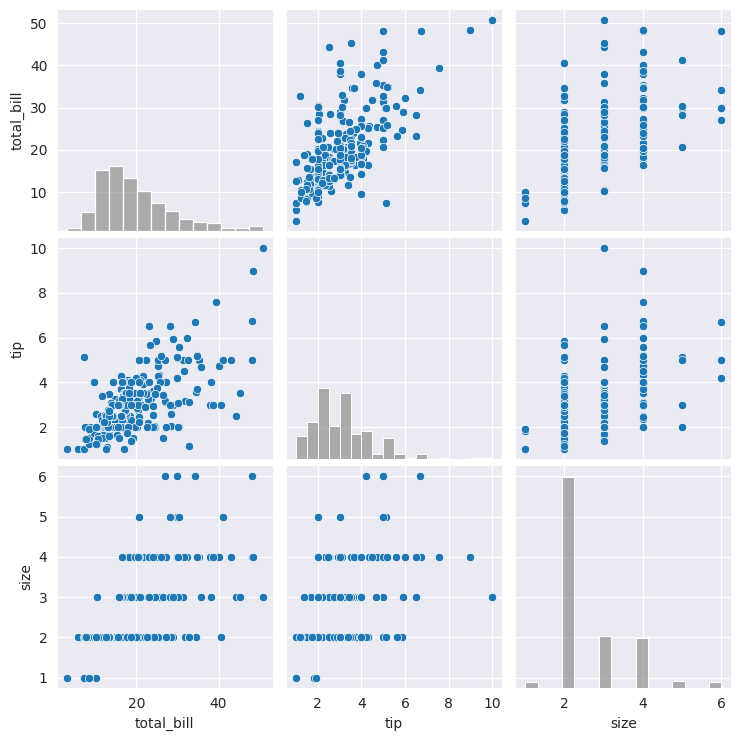

In [ ]:
sns.pairplot(tips, diag_kws={'color': 'gray', 'alpha': 0.6})

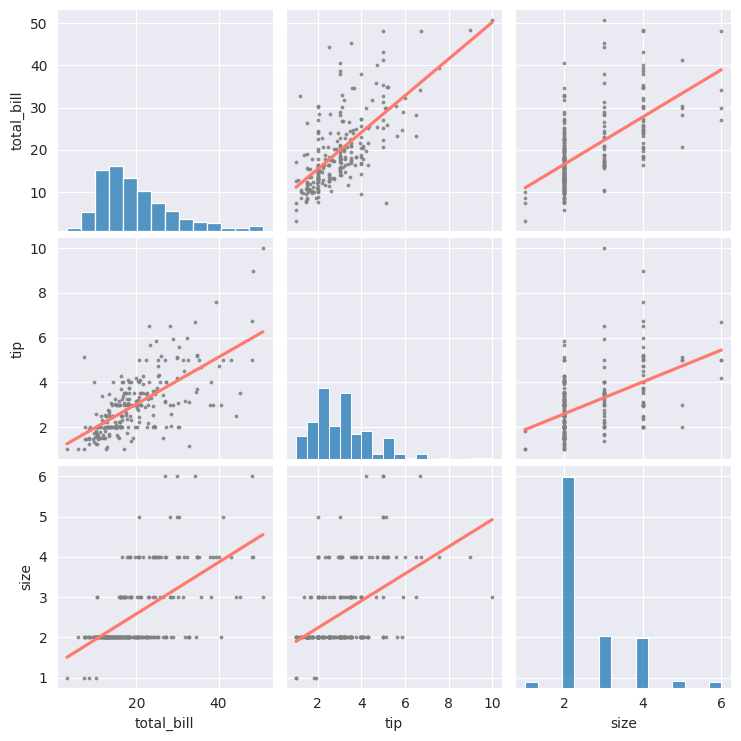

In [ ]:
sns.pairplot(tips,
             kind='reg',
             plot_kws={'ci':None, 'color': 'xkcd:salmon',
                       'scatter_kws': {'color': 'gray', 's': 3}
                      }
            )